In [1]:
%run ../../../import_src.py

import lymedata
from lymedata import *
import constants
from constants import *

import haddock_ssnmf
from haddock_ssnmf import Haddock_SSNMF

import display_ssnmf
from display_ssnmf import *


In [ ]:
# CNS1 Defn
data = LymeData({CHRONIC, NEURO, NON_NEURO},{ADDL_CIR, DIAG_CIR, CATG},{NEURO, NON_NEURO}, defn=DEF_CNS1, drop_99=True)
print(data.df.shape)
print(data.df.columns)

data_matrix, label_matrix = data.get_data_and_labels()

ssnmf = Haddock_SSNMF(data_matrix, label_matrix)
best_accuracy, best_params, accu_distr, Xreconerr_distr, Yreconerr_distr, X_cvtst_reconerr_distr = ssnmf.gridsearch(param_range={'k': range(7,12),'lambda': list(np.linspace(0,1,100)), 'random_state': range(0,100)},
                                                          get_topic_accu_distr=True, get_reconerr_distr=True)
# Total Neuro: 2569
# Total Non-Neuro: 1394

Both Neuro and Mus: 2259
Only Neuro: 310
Only Mus: 762
Neither Neuro nor Mus: 632
Dropping 99
(878, 29)
Index(['recall a tick bite', 'length of time noticed tick bite',
       'treated with antibiotics', 'length of time treated for tick bite',
       'period of time for diagnosis', 'misdiagnosis', 'tick born coinfection',
       'Babesia', 'Bartonella', 'Ehrlichia/ Anaplasma', 'Mycoplasma',
       'Rickettsia', 'Bio Sex', 'Antibiotics', 'Times Infected', 'GROC',
       'Bed Days', 'Mental Health Days', 'Physical Health Days', 'Disability',
       'general practitioner', 'infectious disease specialist', 'internist',
       'lyme specialist', 'other doctor', 'pediatrician', 'rheumatologist',
       'neuro', 'non_neuro'],
      dtype='object')


/home/reu24lyme/alex/code_lib/src/lymedata.py:74: DtypeWarning: Columns (224,249,259,269,274,294,299,304,309,339,344,365,369,373,377,395,399,403,411,415,419,423,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


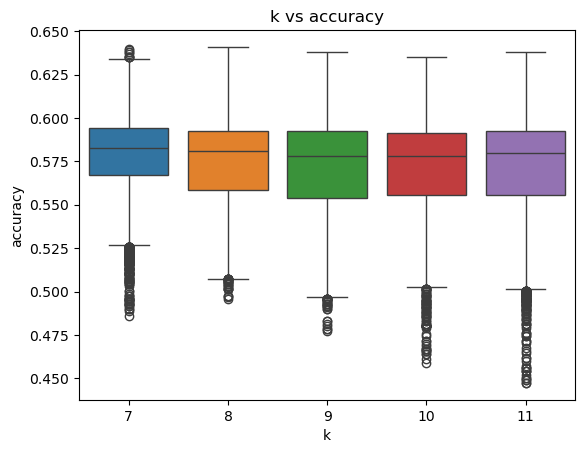

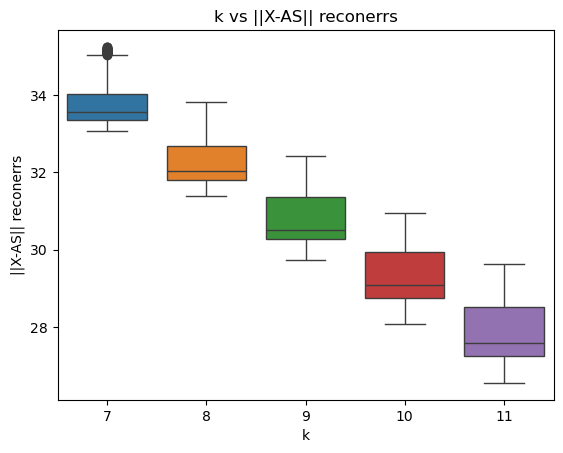

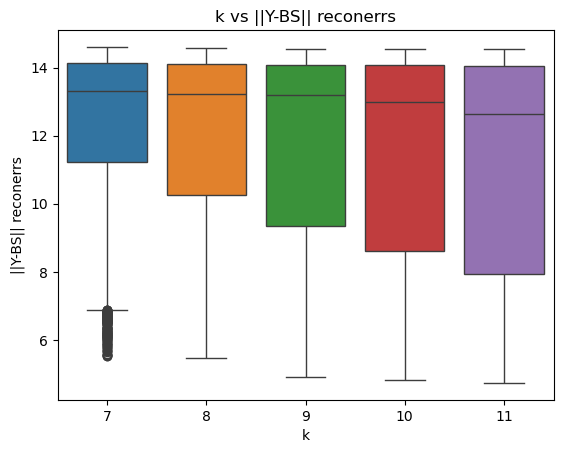

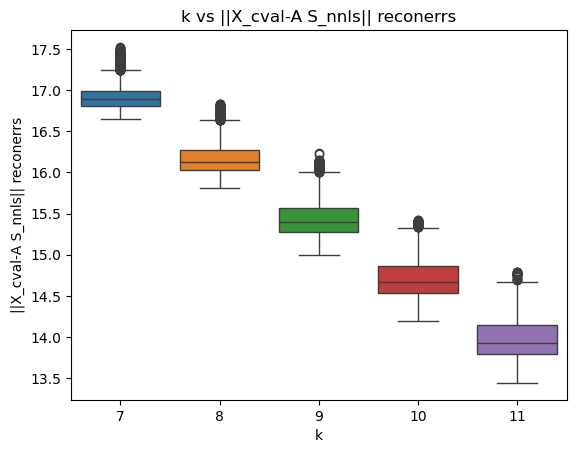

CNS1 Working Definition: Neuro vs Musculo
best accuracy:  0.6409827760891591  best params:  {'k': 8, 'lambda': 0.5353535353535354, 'random_state': 65}
test_accuracy:  0.5965909090909091
test_reconerr:  17.813554989352603


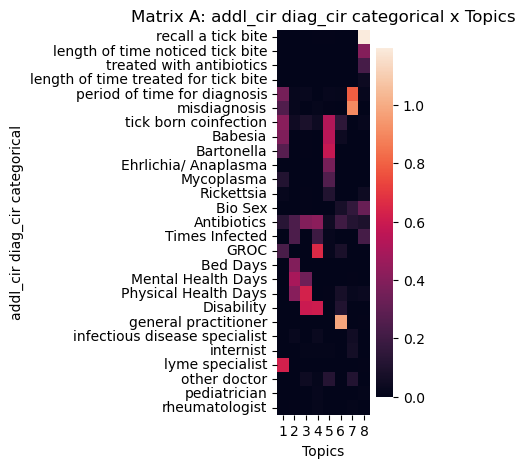

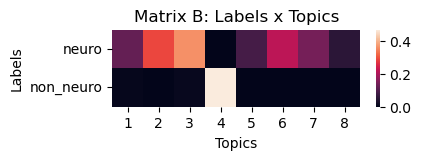

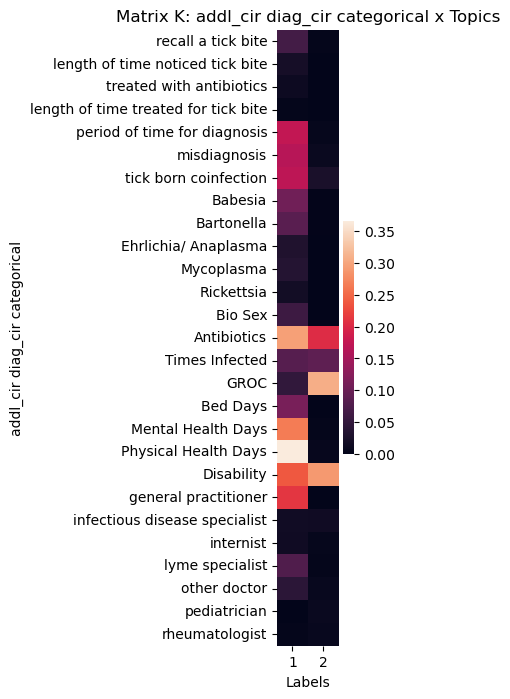

In [8]:
display_distr(accu_distr)
display_distr(Xreconerr_distr, ylabel='||X-AS|| reconerrs')
display_distr(Yreconerr_distr, ylabel='||Y-BS|| reconerrs')
display_distr(X_cvtst_reconerr_distr, ylabel='||X_cval-A S_nnls|| reconerrs')

print('CNS1 Working Definition: Neuro vs Musculo')
print('best accuracy: ', best_accuracy, ' best params: ', best_params)
test_accuracy, X_tst_reconerr = ssnmf.test(best_params)
print('test_accuracy: ', test_accuracy)
print('test_reconerr: ', X_tst_reconerr)

names = ADDL_CIR + " "+ DIAG_CIR + " " + CATG
labels = [x for x in data.df.columns if x not in [NEURO, NON_NEURO]]
best_model = ssnmf.best_model
display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels=data.labels)


In [9]:
accu_distr.to_csv('CNS1_NvN_Cr_Hf_k7-11_l1_r100_Accu.csv', index=False)
Xreconerr_distr.to_csv('CNS1_NvN_Cr_Hf_k7-11_l1_r100_Xrec.csv', index=False)
Yreconerr_distr.to_csv('CNS1_NvN_Cr_Hf_k7-11_l1_r100_Yrec.csv', index=False)

In [10]:
# Accuracy distribution statistics
mean = accu_distr.mean()
Q1 = accu_distr.quantile(0.25)
Q3 = accu_distr.quantile(0.75)
print('Mean Accuracy:')
print(mean)
print('IQR:')
print(Q3 - Q1)

Mean Accuracy:
7     0.578866
8     0.575407
9     0.573107
10    0.572862
11    0.572624
dtype: float64
IQR:
7     0.027004
8     0.034124
9     0.038409
10    0.035534
11    0.036801
dtype: float64


In [11]:
# Xreconerr distribution statistics
mean = Xreconerr_distr.mean()
Q1 = Xreconerr_distr.quantile(0.25)
Q3 = Xreconerr_distr.quantile(0.75)
print('Mean Xreconerr_distr:')
print(mean)
print('IQR:')
print(Q3 - Q1)

Mean Xreconerr_distr:
7     33.738085
8     32.244469
9     30.771710
10    29.301486
11    27.826857
dtype: float64
IQR:
7     0.676612
8     0.875923
9     1.081818
10    1.177319
11    1.258636
dtype: float64


In [12]:
# Yreconerr distribution statistics
mean = Yreconerr_distr.mean()
Q1 = Yreconerr_distr.quantile(0.25)
Q3 = Yreconerr_distr.quantile(0.75)
print('Mean Yreconerr_distr:')
print(mean)
print('IQR:')
print(Q3 - Q1)

Mean Yreconerr_distr:
7     12.405298
8     12.014541
9     11.737778
10    11.474822
11    11.169700
dtype: float64
IQR:
7     2.894574
8     3.833617
9     4.732488
10    5.455357
11    6.115878
dtype: float64


In [13]:
print(data.labels)

{'neuro', 'non_neuro'}
